In [2]:
install.packages("readxl")

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Артем\AppData\Local\Temp\RtmpKet05n\downloaded_packages


In [4]:
library("readxl")

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [11]:
dt<- read_excel("KRSNDR.xlsx", sheet = 7)

In [12]:
cor(dt)

,№,y,x1,x2,x3
№,1.00000000,0.48083209,0.3856536,0.9254399,0.07498901
y,0.48083209,1.00000000,0.5436676,0.5484264,0.09643214
x1,0.38565356,0.54366759,1.0000000,0.5192928,-0.17951259
x2,0.92543988,0.54842644,0.5192928,1.0000000,0.02337040
x3,0.07498901,0.09643214,-0.1795126,0.0233704,1.00000000


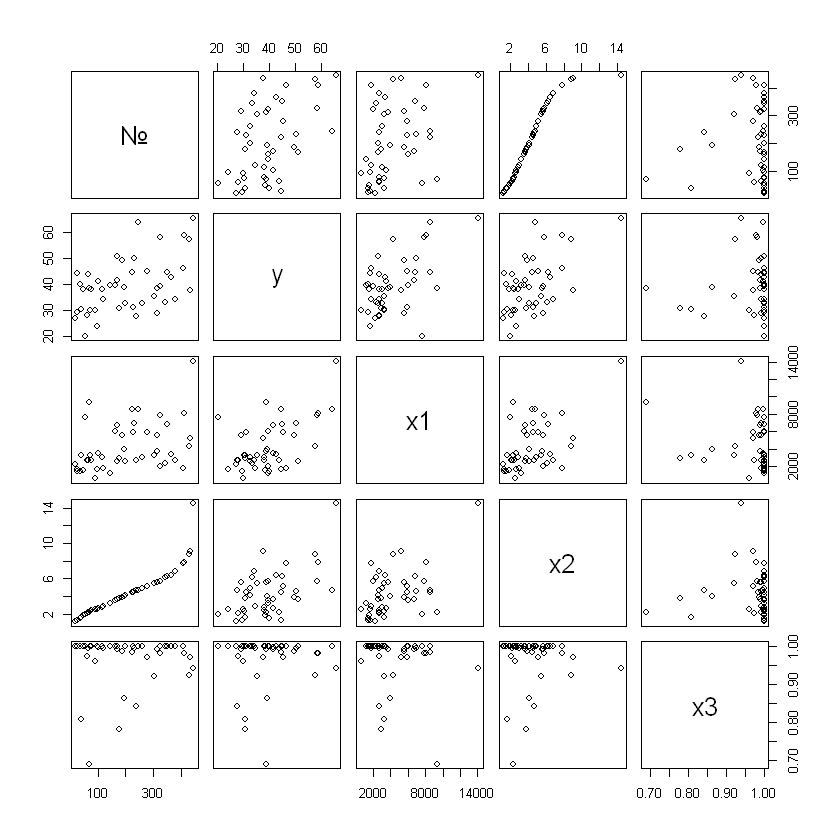

In [13]:
plot(dt)

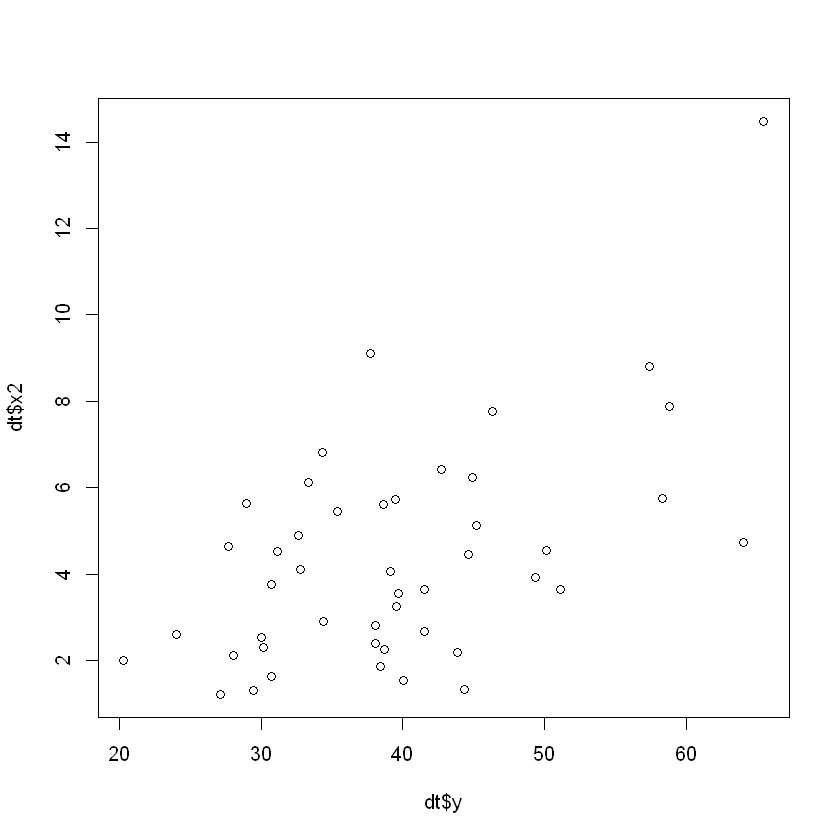

In [14]:
plot(dt$y,dt$x2)

In [15]:
cor(dt$y, dt$x2)

[1] 0.5484264

In [16]:
cor.test(dt$y, dt$x2)


	Pearson's product-moment correlation

data:  dt$y and dt$x2
t = 4.3505, df = 44, p-value = 7.952e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3070059 0.7235329
sample estimates:
      cor 
0.5484264 


In [25]:
mod<-lm(dt$y~dt$x2)

In [41]:
abline(mod, col='red')

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [42]:
summary(mod)


Call:
lm(formula = dt$y ~ dt$x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0163  -6.4463  -0.2783   4.7587  23.6749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.9068     2.5547   11.71 4.17e-15 ***
dt$x2         2.2109     0.5082    4.35 7.95e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.661 on 44 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.2849 
F-statistic: 18.93 on 1 and 44 DF,  p-value: 7.952e-05


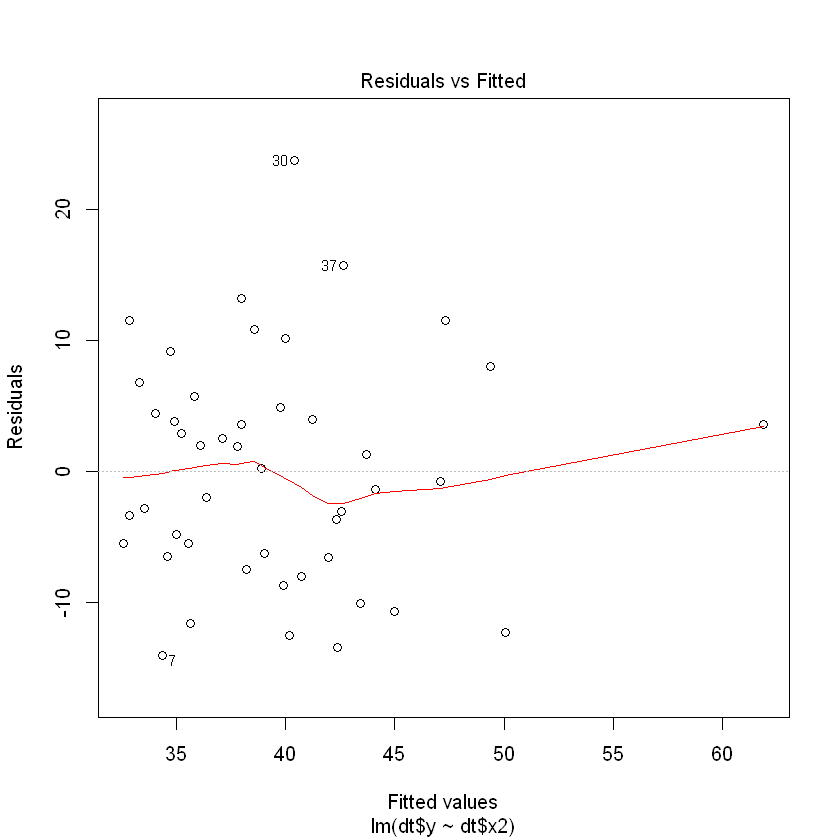

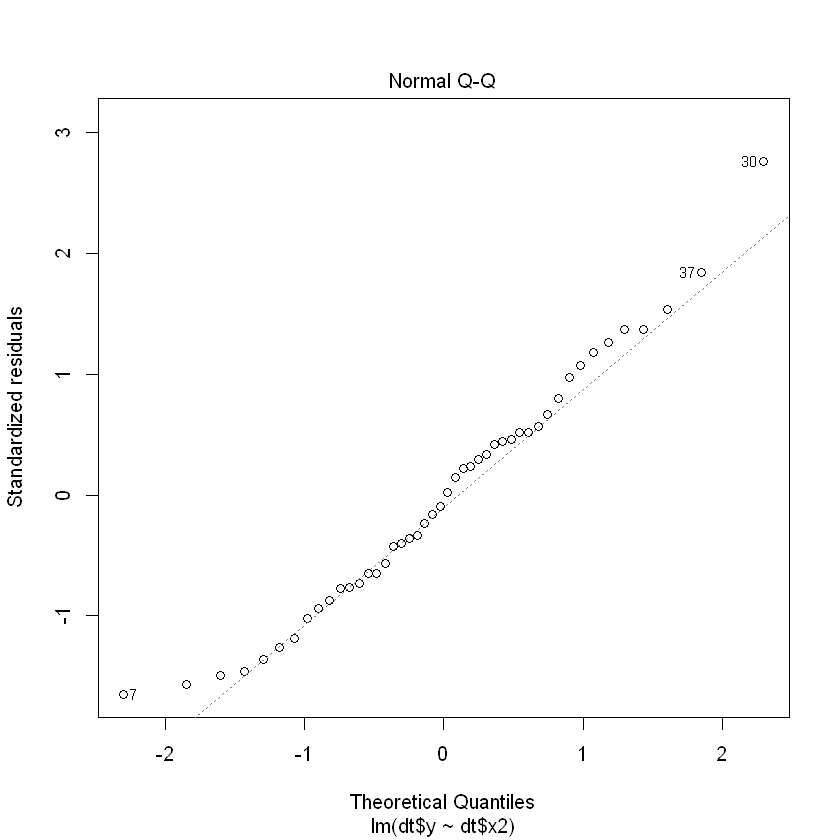

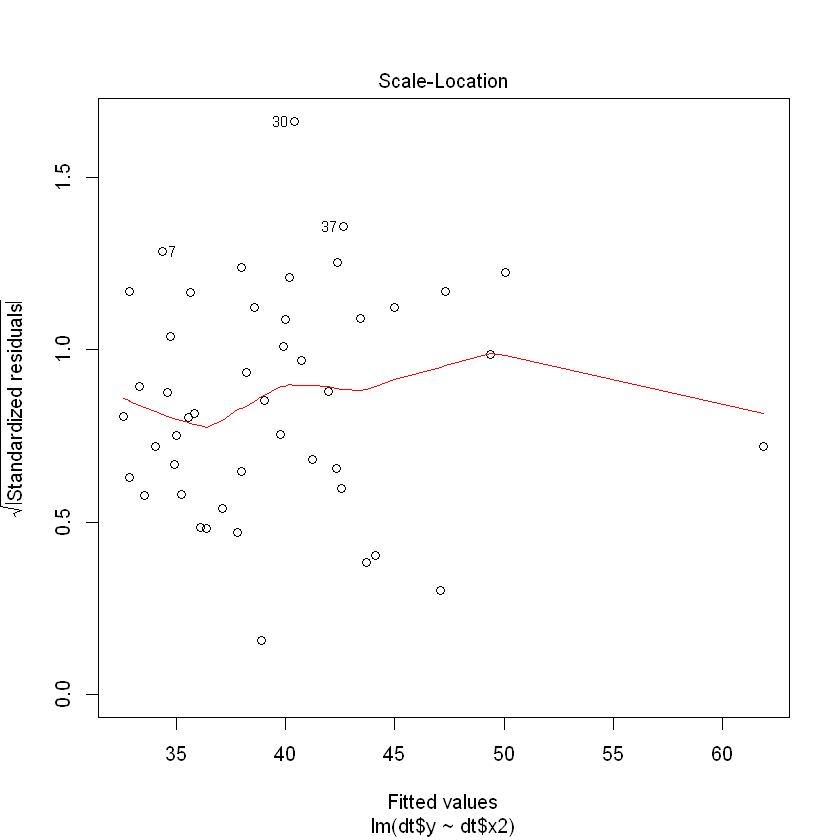

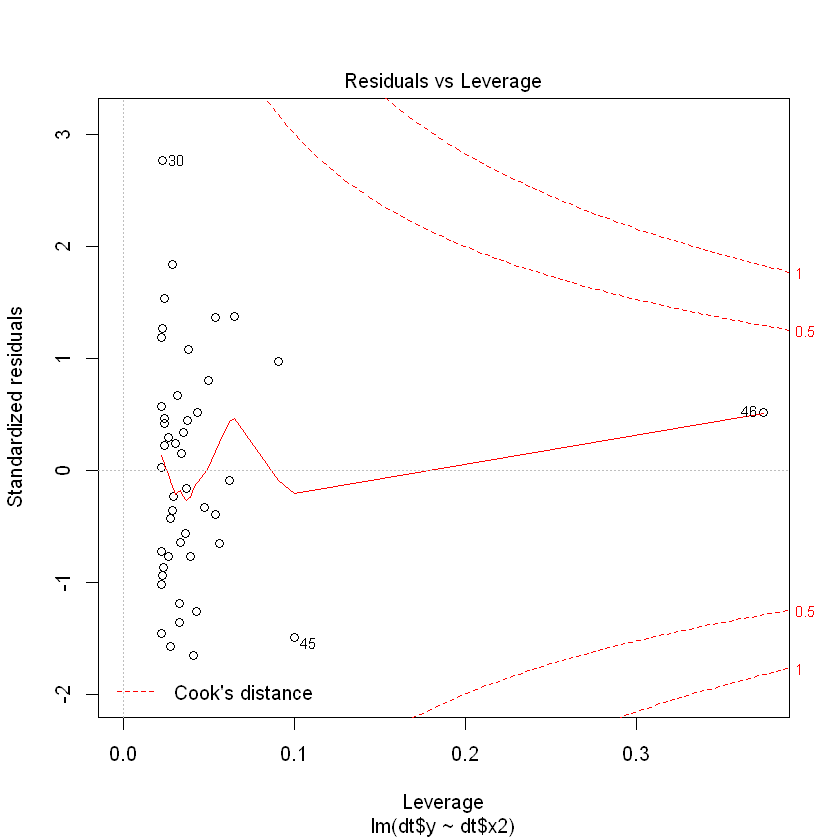

In [43]:
plot(mod)

In [33]:
install.packages('tseries')
install.packages('lmtest')

package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Артем\AppData\Local\Temp\RtmpKet05n\downloaded_packages
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Артем\AppData\Local\Temp\RtmpKet05n\downloaded_packages


In [34]:
library('lmtest')
library('tseries')

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [35]:
dwtest(mod)


	Durbin-Watson test

data:  mod
DW = 2.6058, p-value = 0.9755
alternative hypothesis: true autocorrelation is greater than 0


In [36]:
bptest(mod)


	studentized Breusch-Pagan test

data:  mod
BP = 0.30933, df = 1, p-value = 0.5781


In [37]:
white.test(dt$y,dt$x2)


	White Neural Network Test

data:  dt$y and dt$x2
X-squared = 5.1868, df = 2, p-value = 0.07477


In [38]:
gqtest(mod,fraction=0.33)


	Goldfeld-Quandt test

data:  mod
GQ = 1.2623, df1 = 14, df2 = 13, p-value = 0.3402
alternative hypothesis: variance increases from segment 1 to 2


In [151]:
cov <- function(data,k,t){
    xsr <- mean(data[[k]])
    ysr <- mean(data[[t]])
    sum <- 0 
    leng <- length(data[[k]])
    for ( i in (1:leng)){
        sum <- sum + (data[[k]][i]-xsr)*(data[[t]][i]-ysr)
    } 
    return(sum/(leng-1))
}

In [152]:
cov(dt,'x2','y')

[1] 14.2709

In [157]:
cor <- function(data,k,t){
    r <- cov(data,k,t)
    xsr <- mean(data[[k]])
    ysr <- mean(data[[t]])
    sum1 <- 0 
    sum2 <- 0 
    leng <- length(data[[k]])
    for (i in (1:leng)){
        sum1 <- sum1 + (data[[k]][i]-xsr)**2
        sum2 <- sum2 + (data[[t]][i]-ysr)**2
    }
    
    sx <- sqrt(sum1/(leng-1))
    sy <- sqrt(sum2/(leng-1))
    return(r/(sx*sy))
}

In [158]:
cor(dt,'x2','y')

[1] 0.5484264